In [1]:
from functions import *
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
data5 = load_earlyextinction("bianconi-barabasi_10000_5")
data10 = load_earlyextinction("bianconi-barabasi_10000_10")

In [3]:
file = h5py.File("output/bianconi-barabasi_10000_5/REACTIONnone_FEARnone_FEEDBACKnone.h5")
print(file.attrs["early_extinction_rate"])
file = h5py.File("output/bianconi-barabasi_10000_10/REACTIONnone_FEARnone_FEEDBACKnone.h5")
print(file.attrs["early_extinction_rate"])

0.39759036144578314
0.3548387096774194


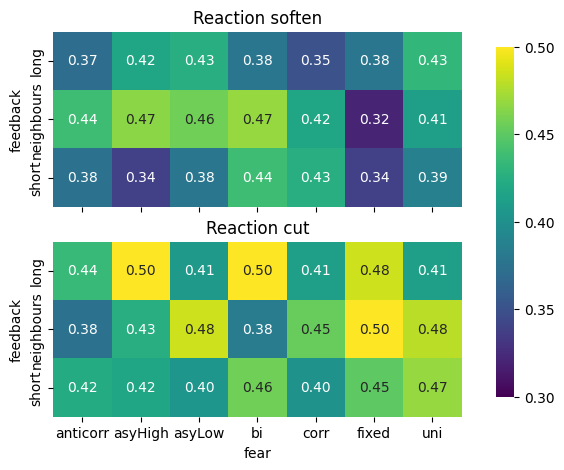

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(6,5), sharex=True)
cbar_ax = fig.add_axes([.91, .15, .03, .7])
data = data5

filter_out = {"feedback":["all","shortlong"]}
mask = np.full(len(data.index),True)
for field,values in filter_out.items():
    for value in values:
        mask = np.logical_and(mask, data10[field]!=value)
data = data.loc[mask]

reactions = ["soften","cut"]
for i,ax in enumerate(axs):
    sliced = data.loc[data["reaction"]==reactions[i]]
    table = sliced.pivot(index="feedback",columns="fear",values="rate")
    ax.set_title(f"Reaction {reactions[i]}")
    sb.heatmap(
        table, vmin=0.3, vmax=0.5, cmap="viridis", annot=True, fmt=".2f",
        square=True, ax=ax, cbar_ax=cbar_ax, cbar_kws={"ticks":np.linspace(0.3,0.5,5)}
    )
axs[0].set_xlabel(None)
fig.subplots_adjust(hspace=0.2)
fig.savefig("plots/earlyextinction/extinction_data5.png")
fig.savefig("plots/earlyextinction/extinction_data5.pdf")

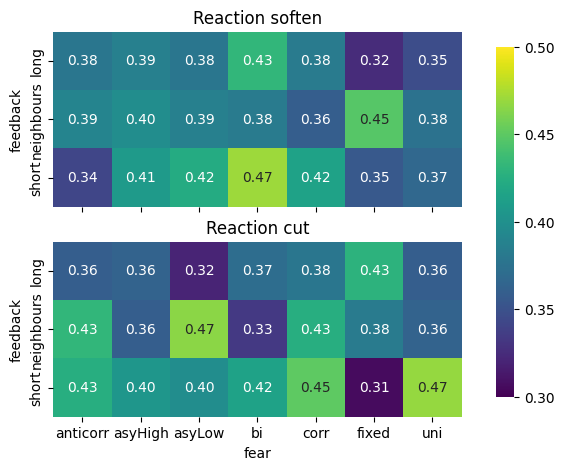

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(6,5), sharex=True)
cbar_ax = fig.add_axes([.91, .15, .03, .7])
data = data10

filter_out = {"feedback":["all","shortlong"]}
mask = np.full(len(data.index),True)
for field,values in filter_out.items():
    for value in values:
        mask = np.logical_and(mask, data10[field]!=value)
data = data.loc[mask]

reactions = ["soften","cut"]
for i,ax in enumerate(axs):
    sliced = data.loc[data["reaction"]==reactions[i]]
    table = sliced.pivot(index="feedback",columns="fear",values="rate")
    ax.set_title(f"Reaction {reactions[i]}")
    sb.heatmap(
        table, vmin=0.3, vmax=0.5, cmap="viridis", annot=True, fmt=".2f",
        square=True, ax=ax, cbar_ax=cbar_ax, cbar_kws={"ticks":np.linspace(0.3,0.5,5)}
    )
axs[0].set_xlabel(None)
fig.subplots_adjust(hspace=0.2)
fig.savefig("plots/earlyextinction/extinction_data10.png")
fig.savefig("plots/earlyextinction/extinction_data10.pdf")